In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.gaussian_process import GaussianProcessRegressor, GaussianProcessClassifier
from sklearn.gaussian_process.kernels import *
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.under_sampling import NearMiss

In [2]:
data_class = pd.read_csv("C:/reps/PoP2023-24/2_sem/1_lab/data/csgo_task.csv")
data_reg = pd.read_csv("C:/reps/PoP2023-24/2_sem/1_lab/data/kc_house_data.csv")

# Классификация

In [3]:
data_class.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122410 entries, 0 to 122409
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   time_left         122410 non-null  float64
 1   ct_score          122410 non-null  float64
 2   t_score           121386 non-null  float64
 3   map               122199 non-null  object 
 4   bomb_planted      122410 non-null  bool   
 5   ct_health         122410 non-null  float64
 6   t_health          121627 non-null  float64
 7   ct_armor          122410 non-null  float64
 8   t_armor           122410 non-null  float64
 9   ct_money          122410 non-null  float64
 10  t_money           122410 non-null  float64
 11  ct_helmets        121766 non-null  float64
 12  t_helmets         121560 non-null  float64
 13  ct_defuse_kits    121766 non-null  float64
 14  ct_players_alive  122410 non-null  float64
 15  t_players_alive   122182 non-null  float64
dtypes: bool(1), float64(

In [4]:
data_class.head(10)

,time_left,ct_score,t_score,map,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,t_money,ct_helmets,t_helmets,ct_defuse_kits,ct_players_alive,t_players_alive
0,175.00,0.0,0.0,de_dust2,False,500.0,500.0,0.0,0.0,4000.0,4000.0,0.0,0.0,0.0,5.0,5.0
1,156.03,0.0,0.0,de_dust2,False,500.0,500.0,400.0,300.0,600.0,650.0,0.0,0.0,1.0,5.0,5.0
2,96.03,0.0,0.0,de_dust2,False,391.0,400.0,294.0,200.0,750.0,500.0,0.0,0.0,1.0,4.0,4.0
3,76.03,0.0,0.0,de_dust2,False,391.0,400.0,294.0,200.0,750.0,500.0,0.0,0.0,1.0,4.0,4.0
4,174.97,1.0,0.0,de_dust2,False,500.0,500.0,192.0,0.0,18350.0,10750.0,0.0,0.0,1.0,5.0,5.0
5,114.97,1.0,0.0,de_dust2,False,500.0,500.0,500.0,0.0,1750.0,10550.0,5.0,0.0,1.0,5.0,5.0
6,94.97,1.0,0.0,de_dust2,False,295.0,111.0,296.0,0.0,1700.0,5000.0,3.0,0.0,0.0,3.0,2.0
7,74.97,1.0,0.0,de_dust2,False,295.0,111.0,296.0,0.0,1700.0,5000.0,3.0,0.0,0.0,3.0,2.0
8,54.97,1.0,0.0,de_dust2,False,249.0,89.0,269.0,0.0,2300.0,2950.0,3.0,0.0,0.0,3.0,1.0
9,174.97,2.0,0.0,de_dust2,False,500.0,500.0,196.0,0.0,19800.0,23450.0,2.0,0.0,0.0,5.0,5.0


In [5]:
data_class.dropna(inplace=True)

In [6]:
data_class.duplicated().sum()

5618

In [7]:
data_class = data_class.drop_duplicates().reset_index(drop=True)

In [8]:
data_class = data_class.join(pd.get_dummies(data_class["map"], dtype=int))
data_class.drop(["map"], axis=1, inplace=True)

In [9]:
columns_to_int = [
    "ct_score",
    "t_score",
    "ct_health",
    "t_health",
    "ct_armor",
    "t_armor",
    "ct_money",
    "t_money",
    "ct_helmets",
    "t_helmets",
    "ct_defuse_kits",
    "ct_players_alive",
    "t_players_alive",
    "bomb_planted",
]

In [10]:
for column in columns_to_int:
    data_class[column] = data_class[column].astype(int)

In [11]:
data_class.head(10)

,time_left,ct_score,t_score,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,t_money,...,ct_players_alive,t_players_alive,de_cache,de_dust2,de_inferno,de_mirage,de_nuke,de_overpass,de_train,de_vertigo
0,175.00,0,0,0,500,500,0,0,4000,4000,...,5,5,0,1,0,0,0,0,0,0
1,156.03,0,0,0,500,500,400,300,600,650,...,5,5,0,1,0,0,0,0,0,0
2,96.03,0,0,0,391,400,294,200,750,500,...,4,4,0,1,0,0,0,0,0,0
3,76.03,0,0,0,391,400,294,200,750,500,...,4,4,0,1,0,0,0,0,0,0
4,174.97,1,0,0,500,500,192,0,18350,10750,...,5,5,0,1,0,0,0,0,0,0
5,114.97,1,0,0,500,500,500,0,1750,10550,...,5,5,0,1,0,0,0,0,0,0
6,94.97,1,0,0,295,111,296,0,1700,5000,...,3,2,0,1,0,0,0,0,0,0
7,74.97,1,0,0,295,111,296,0,1700,5000,...,3,2,0,1,0,0,0,0,0,0
8,54.97,1,0,0,249,89,269,0,2300,2950,...,3,1,0,1,0,0,0,0,0,0
9,174.97,2,0,0,500,500,196,0,19800,23450,...,5,5,0,1,0,0,0,0,0,0


<Axes: >

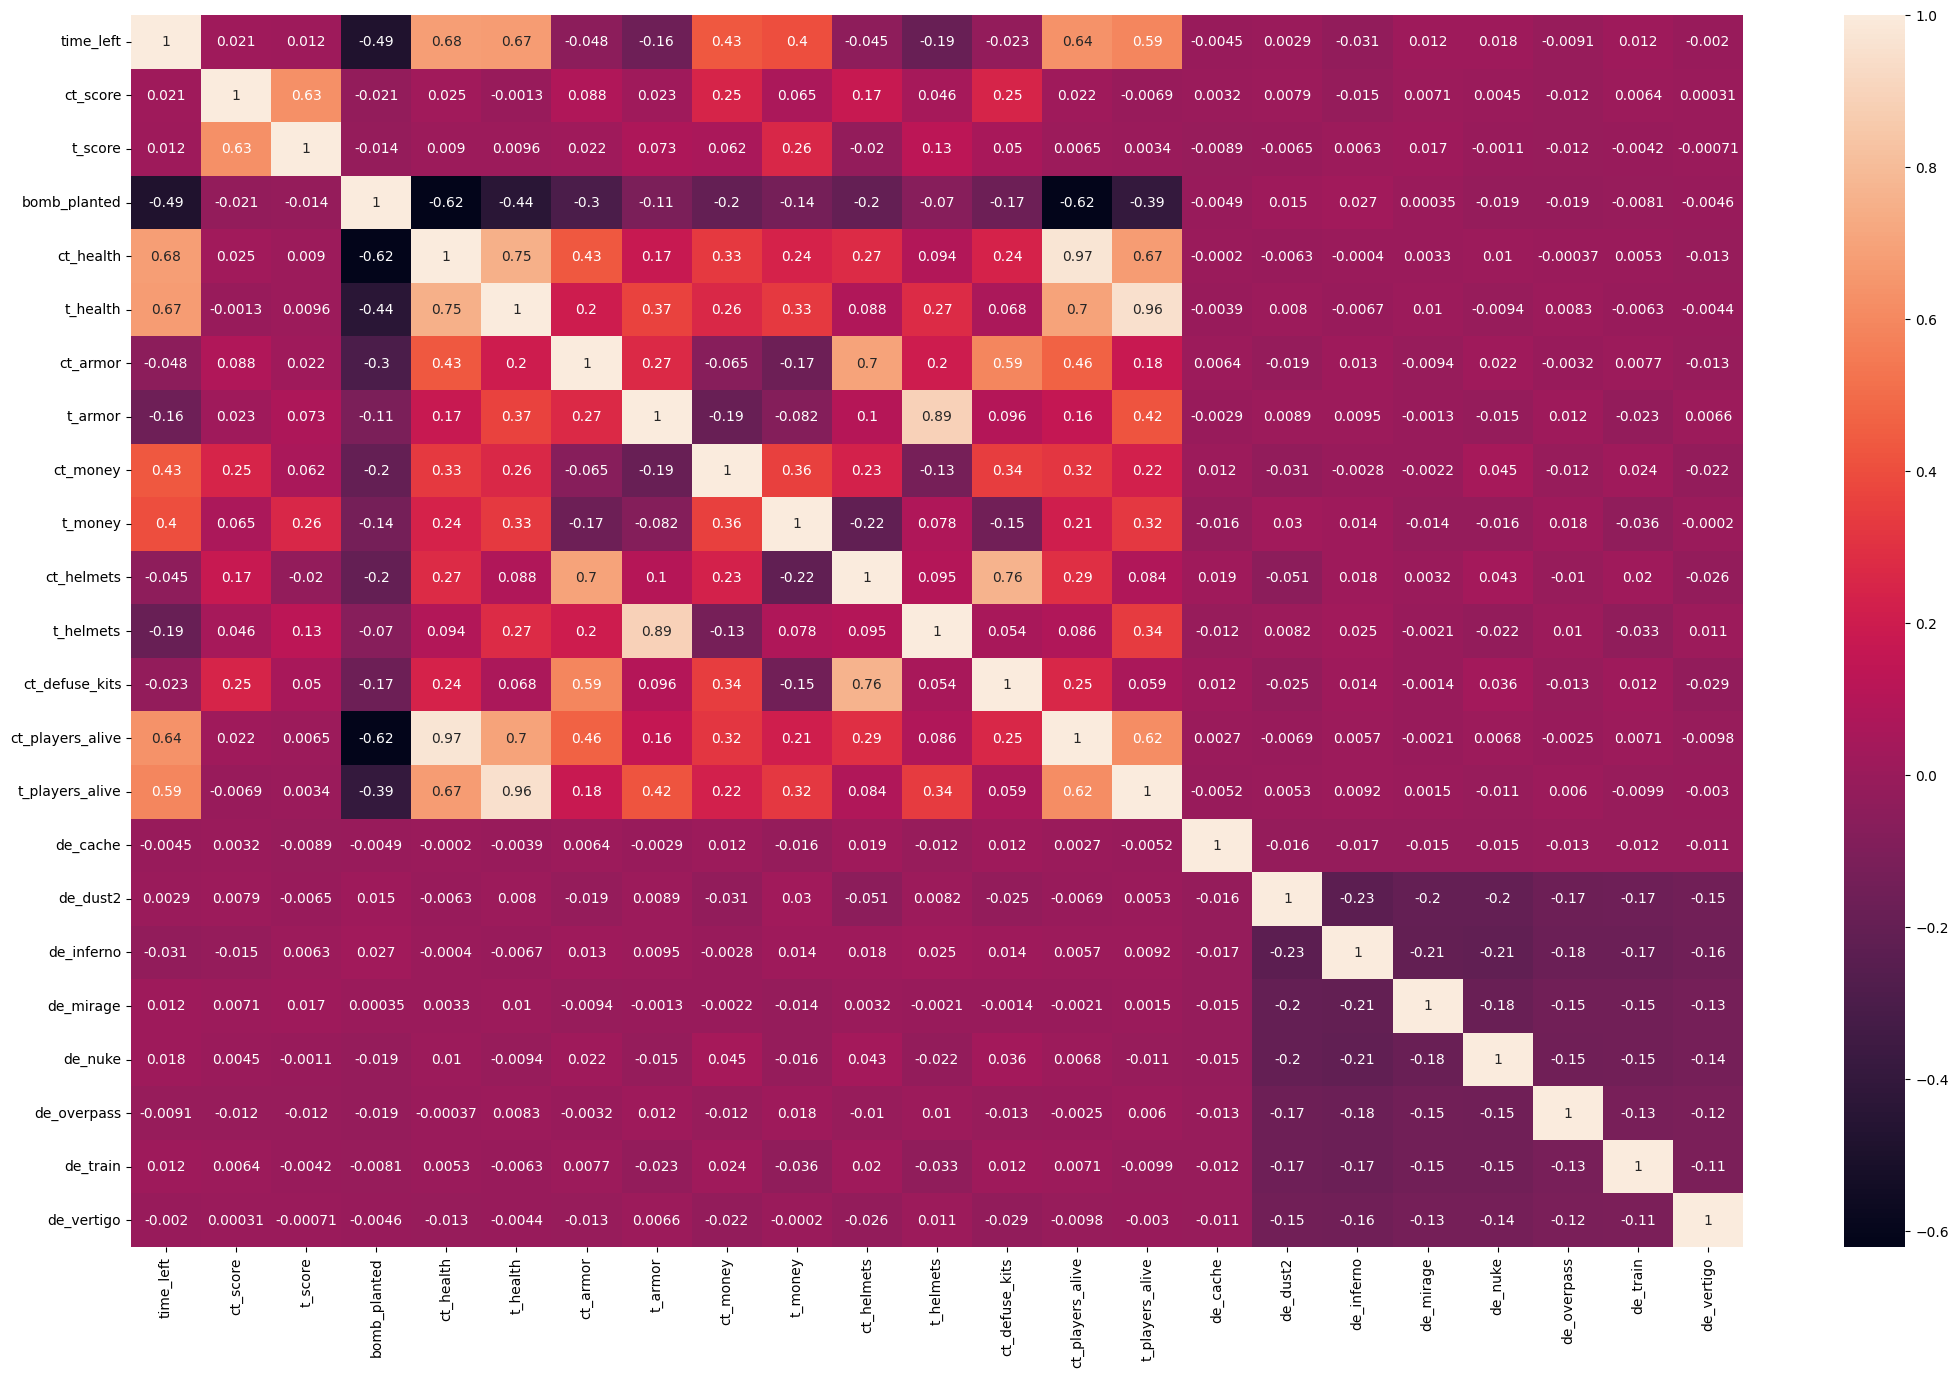

In [12]:
df_num = data_class.select_dtypes(include=np.number)
df_corr = df_num.corr()
plt.figure(figsize=(26, 16))
sns.heatmap(df_corr, annot=True)

In [13]:
data_class.drop(
    columns=["ct_players_alive", "t_players_alive", "ct_helmets", "t_helmets"],
    inplace=True,
)

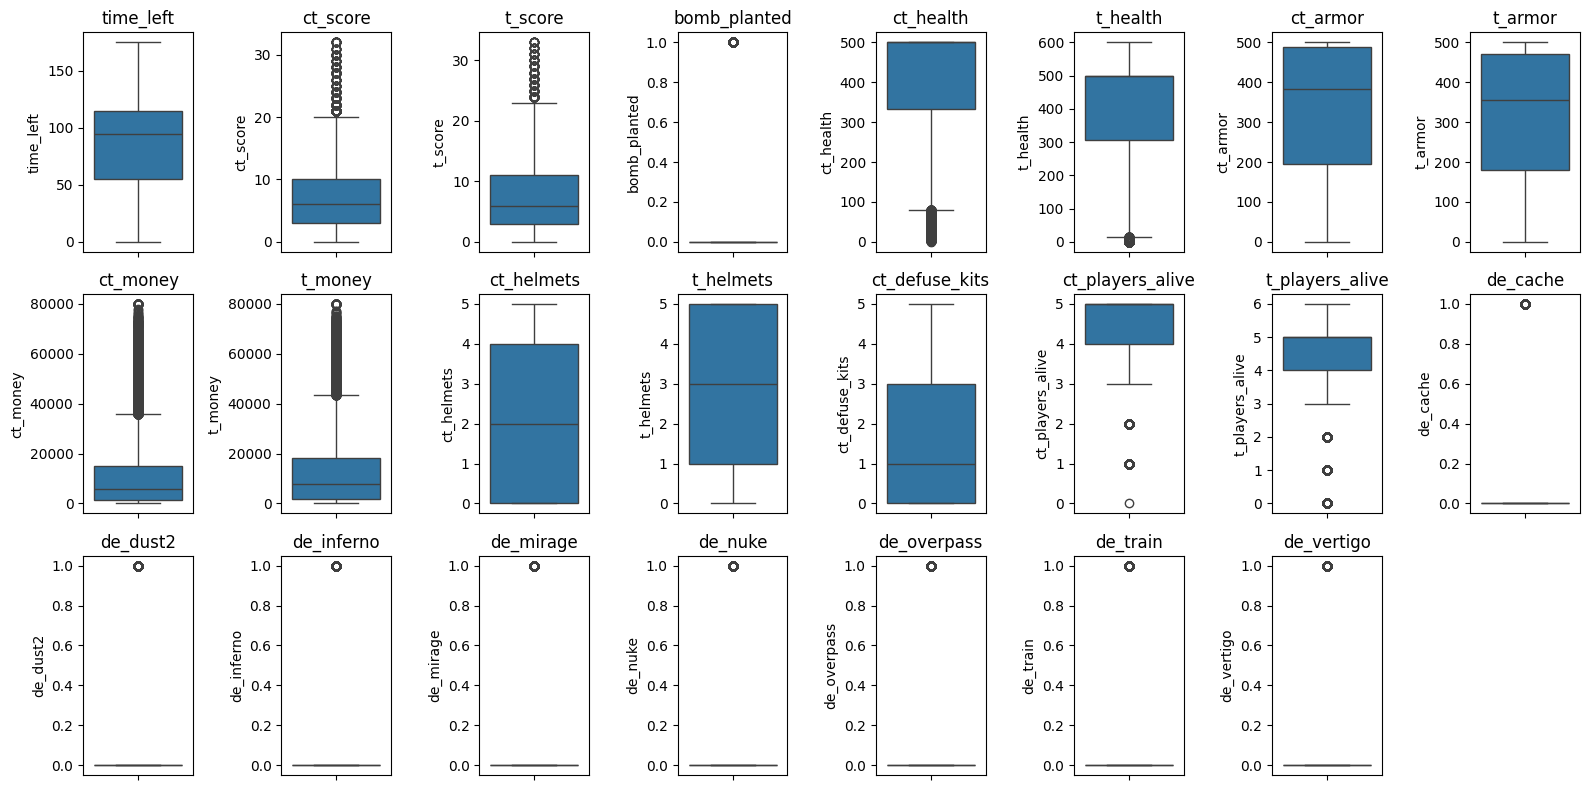

In [14]:
plt.figure(figsize=(16, 8))
for i, column in enumerate(df_num.columns):
    plt.subplot(3, 8, i + 1)
    sns.boxplot(data=df_num, y=column)
    plt.title(column)

plt.tight_layout()
plt.show()

In [15]:
X = data_class.drop("bomb_planted", axis=1)
y = data_class["bomb_planted"]

In [16]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [17]:
scaler=StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [18]:
print(f'1: {sum(y_train == 1)}')
print(f'0: {sum(y_train == 0)}')

1: 10490
0: 79486


In [19]:
nm = NearMiss()
X_train, y_train = nm.fit_resample(X_train, y_train.ravel())

C:\Temp\ipykernel_5904\861356996.py:2: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  X_train, y_train = nm.fit_resample(X_train, y_train.ravel())


In [20]:
print(f'1: {sum(y_train == 1)}')
print(f'0: {sum(y_train == 0)}')

1: 10490
0: 10490


In [22]:
params_grid = {
    "max_iter_predict": [100],
    "kernel": [
        DotProduct(),
    ],
}
model = GridSearchCV(GaussianProcessClassifier(), params_grid).fit(X_train, y_train)
y_pred = model.predict(X_test)

KeyboardInterrupt: 